# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
# loading data
data = pd.read_csv('used_device_data.csv') ## Complete the code to read the data

In [3]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Data Overview

- Observations
- Sanity checks

In [4]:
data.shape

(3454, 15)

There are 15 columns, and 3455 rows of data for this data set. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [6]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


In [7]:
data.duplicated().sum()

0

There is no duplication within the data set. 

In [8]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are many missing values in the main_camera.mp which I will impute with the median, and use the median for the int_memory, ram, battery, weight, and selfie_camera_mp 

In [9]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate Analysis

#### 1. What does the distribution of normalized used device prices look like? 
    The normalized used device price falls mostly betweeen 4 & 5 dollars, and a has a close to normal distribution. There is a bit of a left skew for less than 3 dollars. 
    

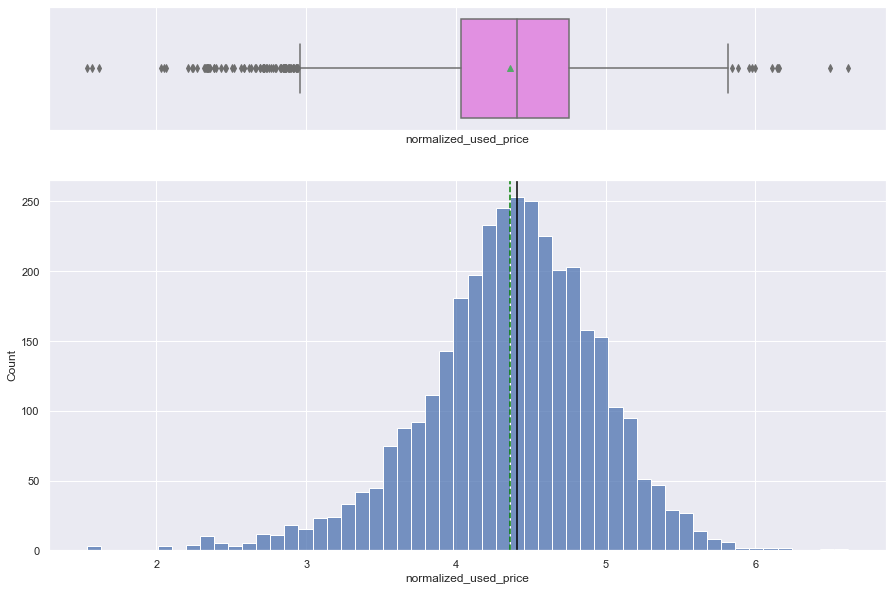

In [11]:
histogram_boxplot(df, "normalized_used_price")

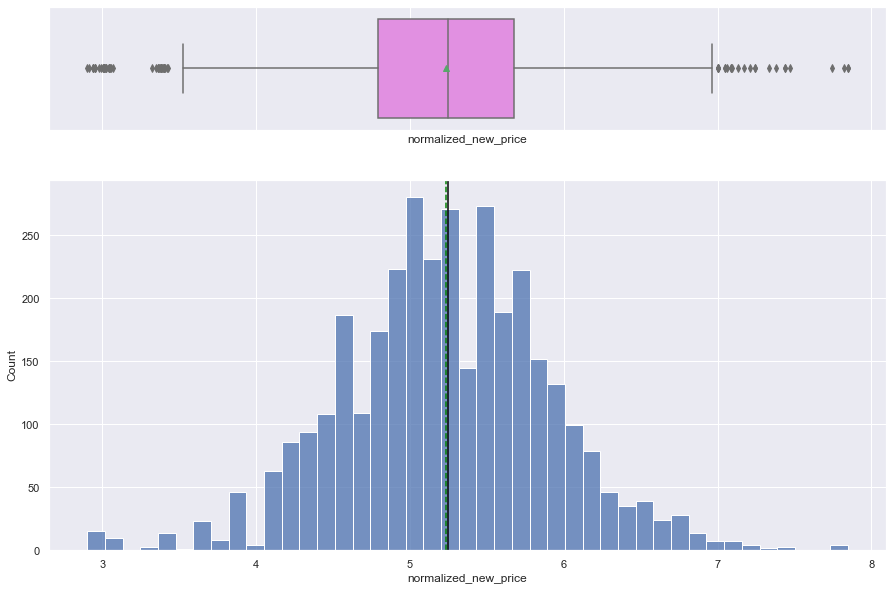

In [12]:
histogram_boxplot(df, "normalized_new_price")

When compared to the the normalized_used_price, we can see that the normalized_new_price is less normal. We can also see that the median price is higher than the used price. 

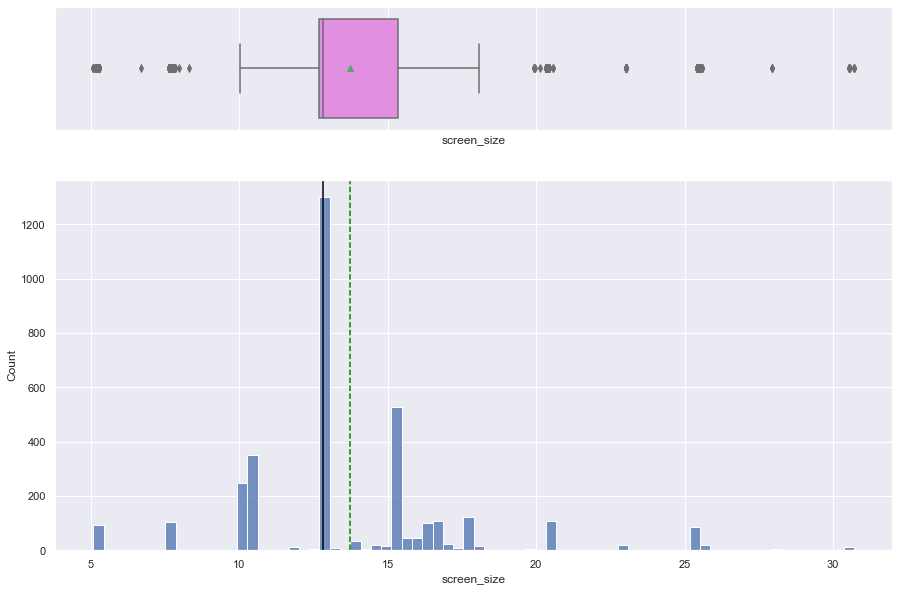

In [13]:
histogram_boxplot(df, "screen_size")

There is no real trend for screen size other than more than 1200 devices have a screen size around 12cm. The majority of the size falls betheen 12 and 17 cm. 

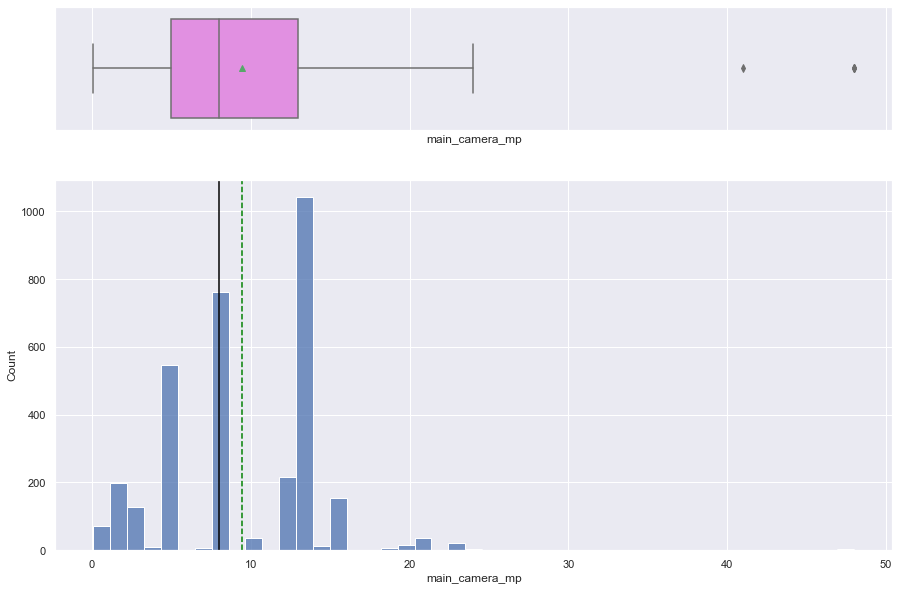

In [14]:
histogram_boxplot(df, "main_camera_mp")

Looking at the count for the main camera we can see there is a big difference between the median and mean for resolution. This category also has the highest null count. Looking at the distribution I would use the median over the mode to impute the missing values. In my mind it is better to underpromise and over deliver than  overpromise and underdeliver. 

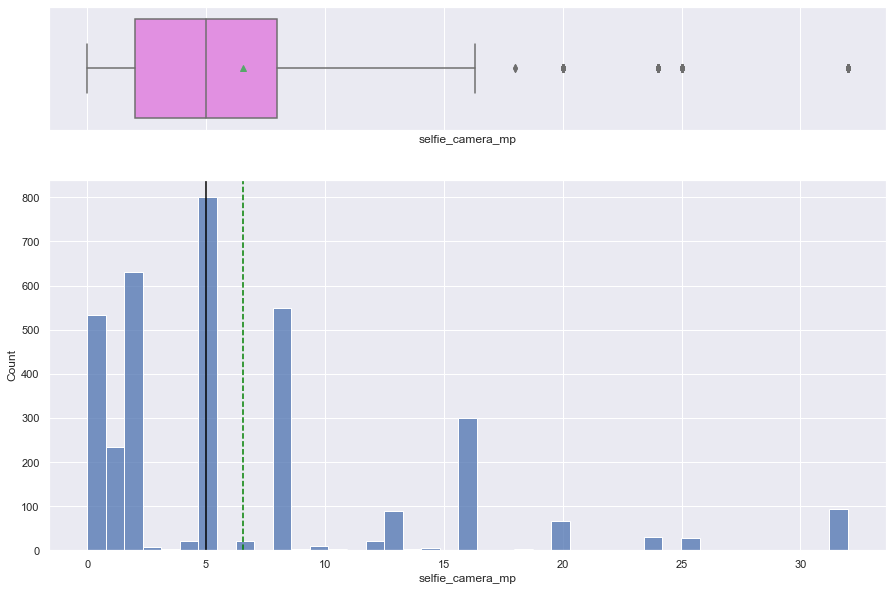

In [15]:
histogram_boxplot(df, "selfie_camera_mp")

Again same scenario as above, and I will fill in missing values with the median rather than the mean. 

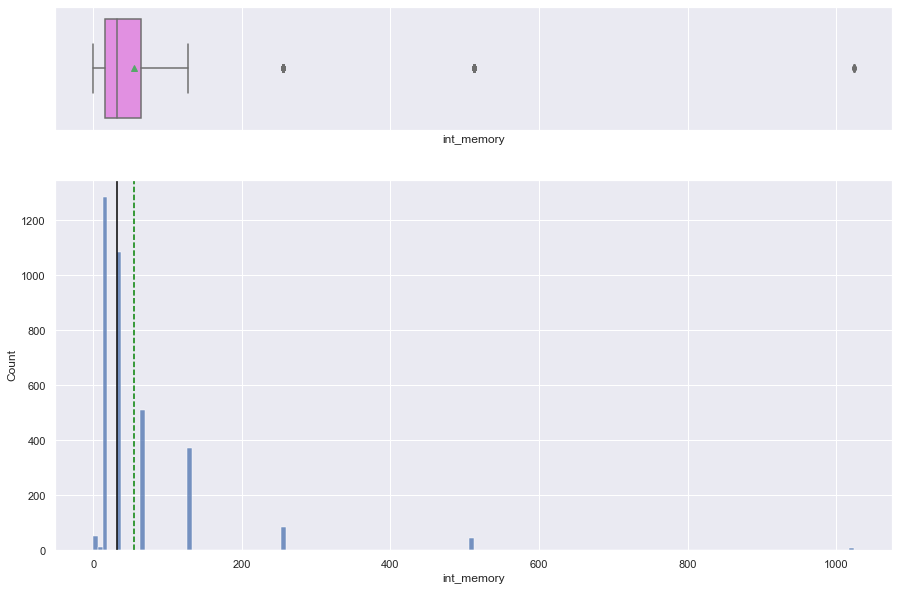

In [16]:
histogram_boxplot(df, "int_memory")

We can see that the internal memory typically falls under 32GB which is fairly standard. Again for imputing missing values I will go with the median and not the mean. 

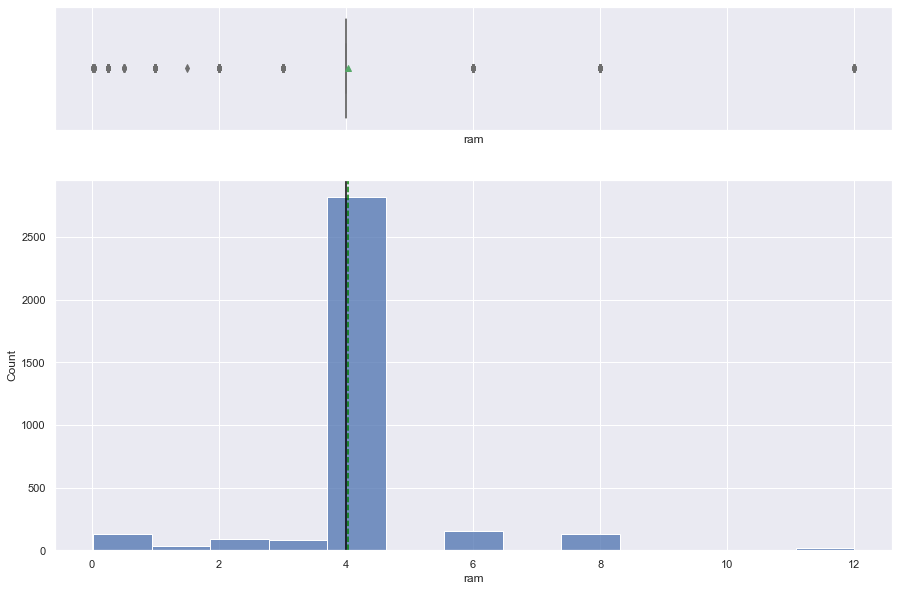

In [17]:
histogram_boxplot(df, "ram")

The prevalent ram for these devices is 4GB, so any missing valuse will be imputed as 4. 

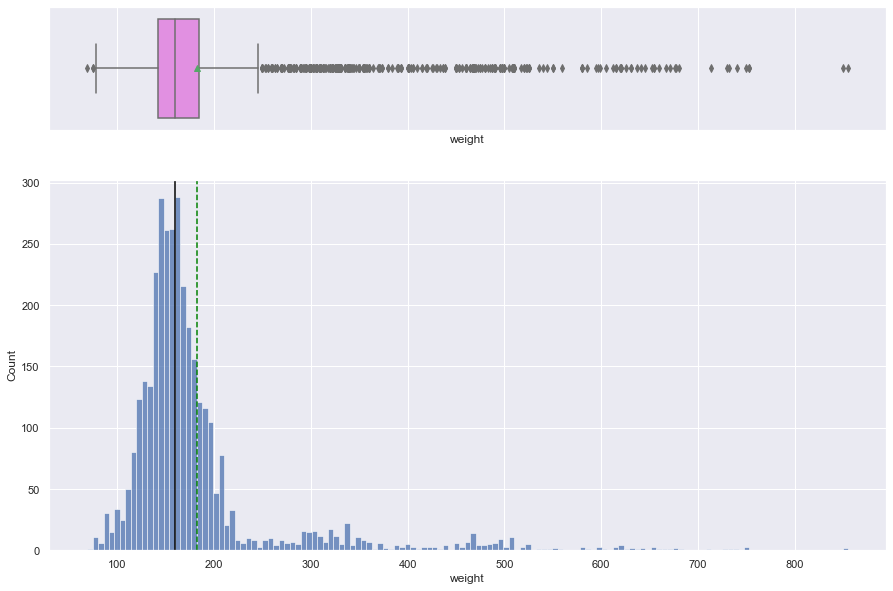

In [18]:
histogram_boxplot(df, "weight")

We can see a heavy left skew on the weight, most devices are around 160g. I see no use for this info other than estimating shipping costs which of cousre would factor into the price of the used device. 

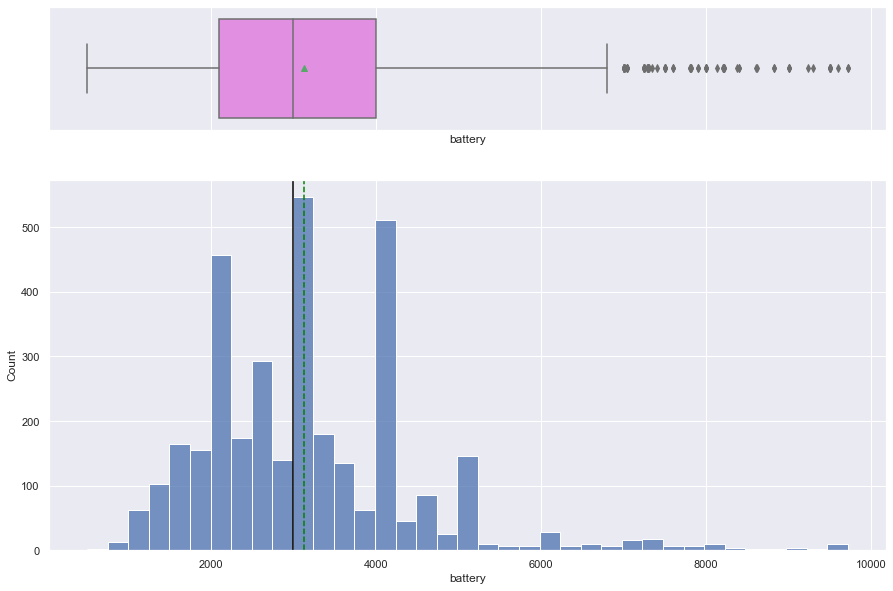

In [19]:
histogram_boxplot(df, "battery")

The battery size Mean, mode and median are all aroun the 3000 mark. This is good info so that we know what kind of charger/cable to purchase and can do so in bulk to again keep our cost down. 

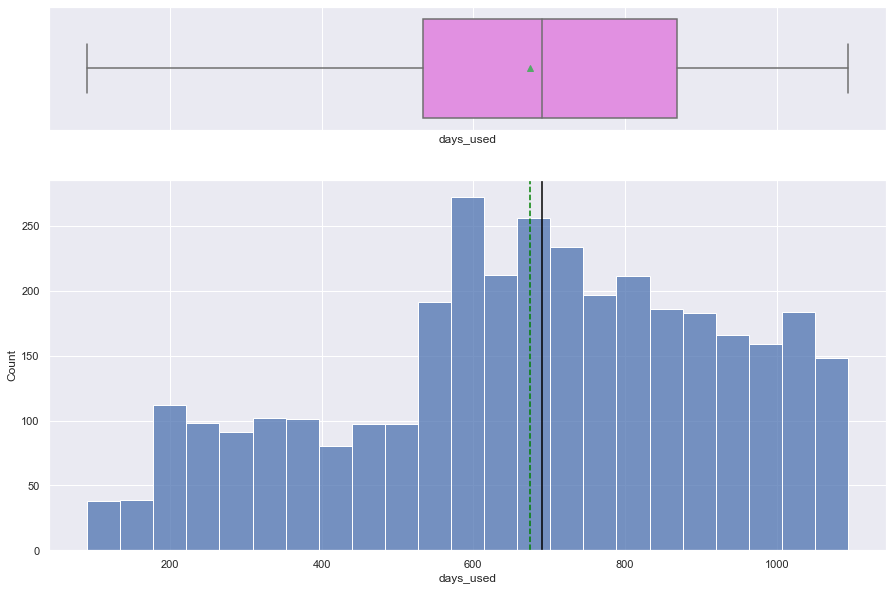

In [20]:
histogram_boxplot(df, "days_used")

We can see that he median and mean fall around 700 days or about 2 years. This makes sense as newer more exciting devices come out every year, but most consumers replace every 2. It also means that we can use this info to determine more indemand features to help price the phone. 

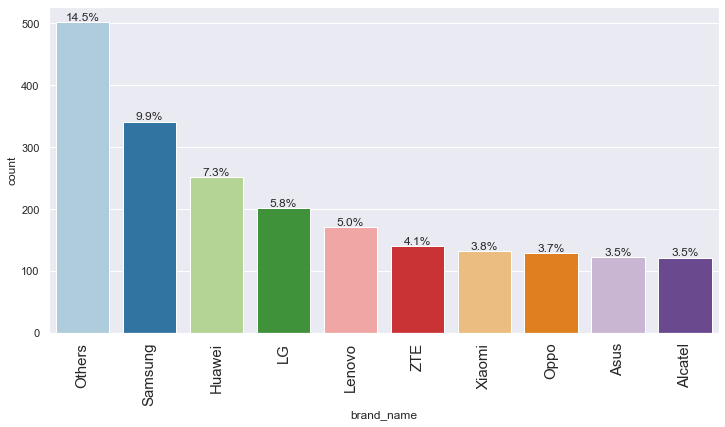

In [23]:
labeled_barplot(df, "brand_name", perc=True, n=10)

We can see that the top brands are Samsung, Huawei, and LG again if the brand is name recognized it can demand a higher price. 

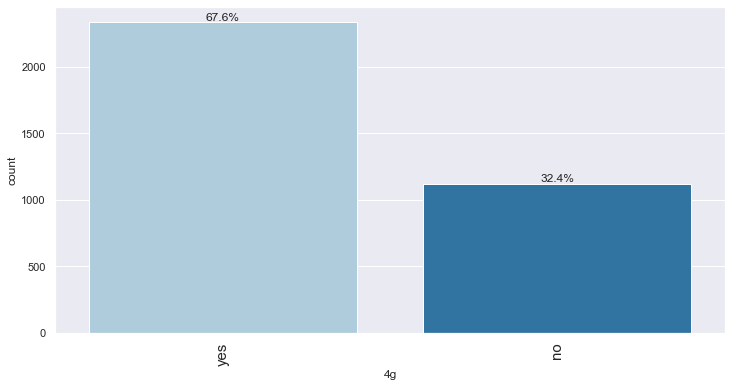

In [24]:
labeled_barplot(df, "4g", perc=True, n=10)

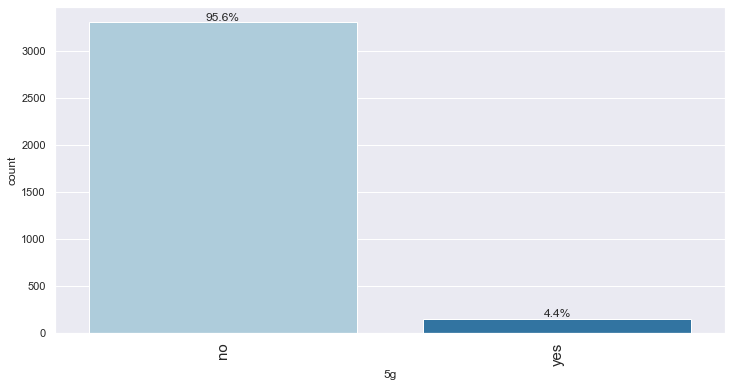

In [25]:
labeled_barplot(df, "5g", perc=True, n=10)

I was hoping these graphs would be mirror images of eachother. What we actually see is that the majority of the devices are 3g or 4g compatible. This affects the speed at which they can access feature outside of calls. The 4.4% of devices that can access 5g will again demand a higher price. 

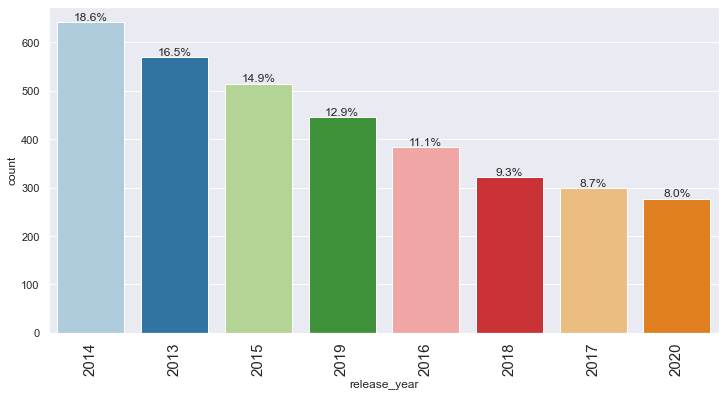

In [26]:
labeled_barplot(df, "release_year", perc=True, n=10)

Newer devices will have earn a higher price. 80% of the phones are older than 2 years. 

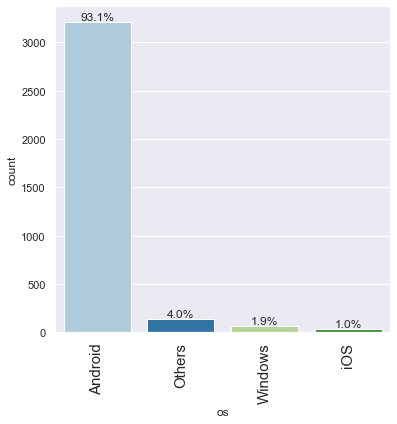

In [27]:
labeled_barplot(df, "os", perc=True)

#### 2. What percentage of the used device market is dominated by Android devices?
93.1% of the devices in this set have Android as the operating system. 

## Bivariate Analysis


#### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

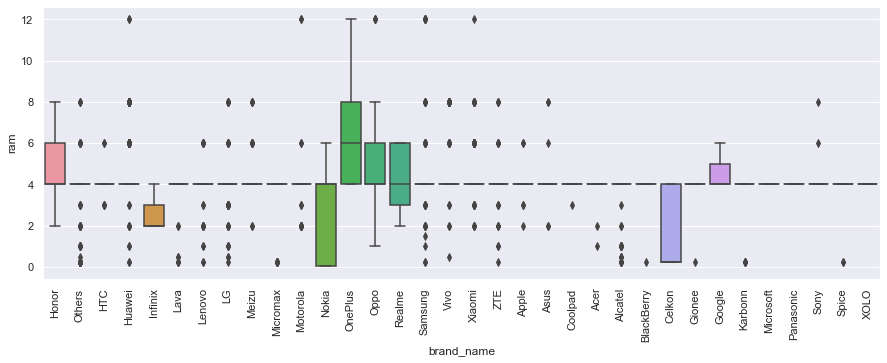

In [28]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

There are quite a few brands that almost exclusively manufactur phones with 4GB of ram. There is some varability among the top brands, but the industry standard seems to be the 4GB. Anything lower will mean that we won't be able to charge a high price. The fact that there are many devices under 4GB meand there is a market, and someone who doesn't need a phone for much more than calls would be fine purchasing a less powerful device.  

#### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [29]:
#create a new dataframe with heavy batteries. 
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

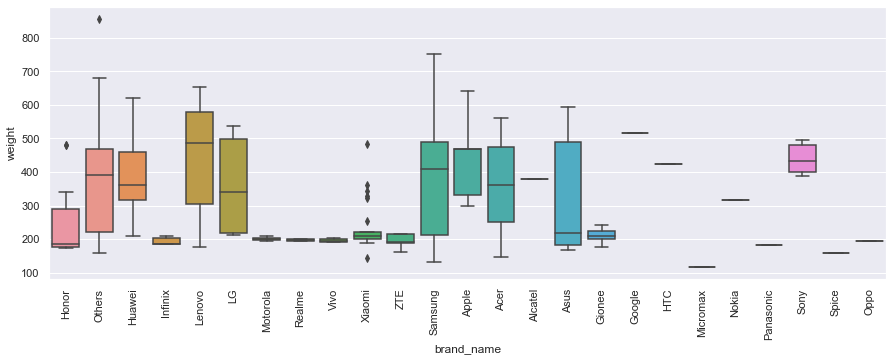

In [30]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery, x='brand_name', y='weight') ## Creates a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)

plt.show()

When we look at most of our devices those that are of the Samsung, Huawei, and LG brands we see that these devices tend to weigh around 400 grams. Most of these devices hover around 400 grams, which is not overly heavy and seems to be an standard for the industry. 

#### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [31]:
#Create a dataframe for devices with large screens. 
df_large_screen = df[df.screen_size > 6 * 2.54] #The dataset has screen size in cm and multiplying by 2.54 converts the 6 inch requirement to cm. 
df_large_screen.shape

(1099, 15)

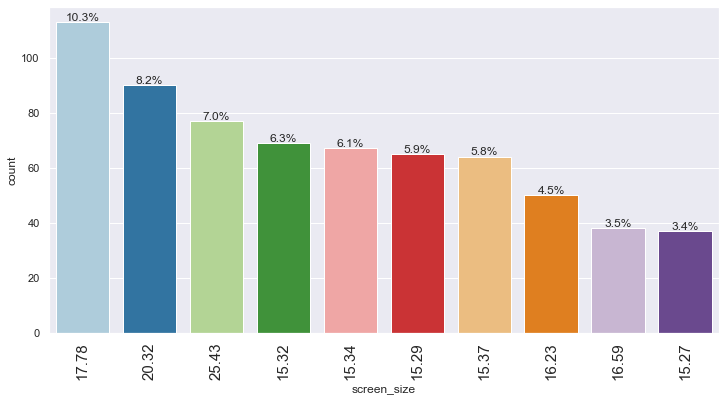

In [32]:
labeled_barplot(df_large_screen, "screen_size", perc=True, n=10) ## Creates labeled_barplot for 'brand_name' in large screen dataframe

5. We can see that there are 1099 devices that are larger than 6 inches. With 25% of them exceeding 7 inches. 

#### 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?


In [33]:
#Creates a new data frame for selfie cameras larger than 8mp.

df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

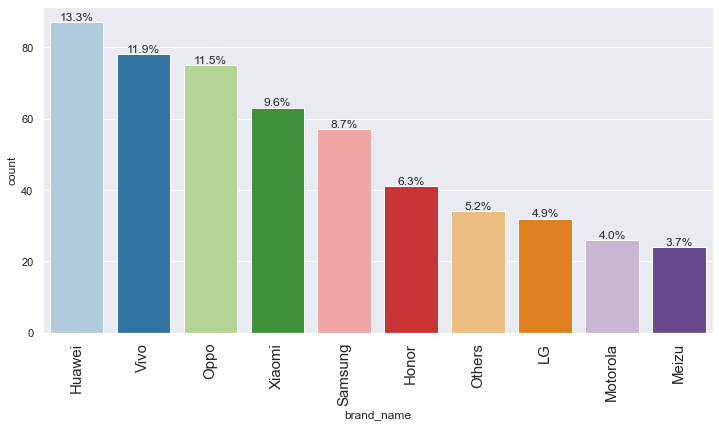

In [34]:
labeled_barplot(df_selfie_camera, "brand_name", perc=True, n=10) #create labeled_barplot for 'brand_name' in high selfie camera dataframe

6. We can see that 655 devices have excellent selfie cameras. We can also see that that about 29% of those devices are top name brands (Samsung, Huawei, and LG) and can therefore demand a higher price. 

#### 7. Which attributes are highly correlated with the normalized price of a used device?

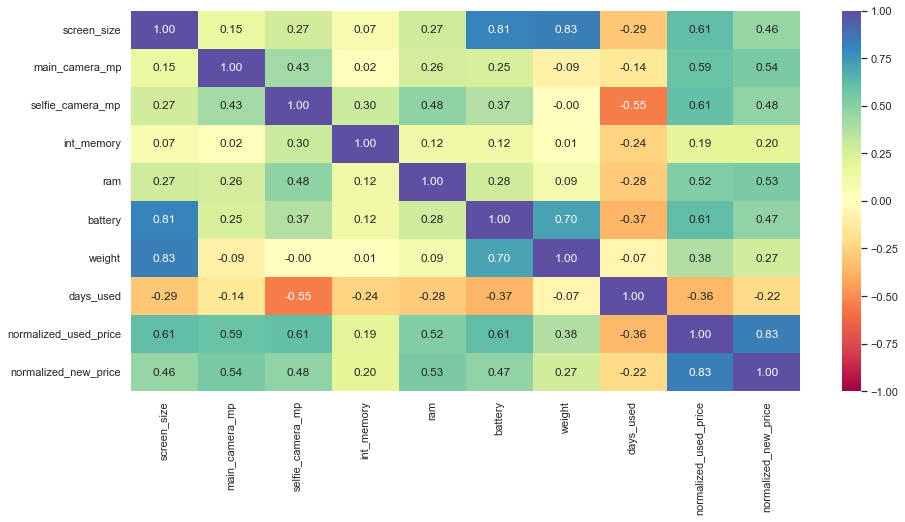

In [35]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

As one would expect there is a significant correlation between weight and battery. There is also a decenct negative correlation between days used and selfie_camera_mp, this may be due to the fact newer phones tend to have better cameras, and it was only recently that the selfie cameras were given an upgrade. 

7. Obvious correlations for normalized used prices are the new price, the battery, the cameras, the screen, and the ram. These all make sense, since they are often significant factors when purchasing a phone. 

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

##### Missing value treatment

In [36]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [37]:
# we first create a copy of the data to avoid changes to it
df_nmv = df.copy()

In [38]:
df_nmv['main_camera_mp'] = df_nmv['main_camera_mp'].fillna(
        value=df_nmv.groupby(['brand_name',])['main_camera_mp'].transform("median")
    ) 

In [39]:
df_nmv['main_camera_mp'] = df_nmv['main_camera_mp'].fillna(
        value=df_nmv.groupby(['release_year',])['main_camera_mp'].transform("median")
    ) 

In [40]:
df_nmv['int_memory'] = df_nmv['int_memory'].fillna(
        value=df_nmv.groupby(['release_year', 'brand_name'])['int_memory'].transform("median")
    ) 

In [41]:
df_nmv['ram'] = df_nmv['ram'].fillna(
        value=df_nmv.groupby(['release_year', 'brand_name'])['ram'].transform("median")
    ) 

In [42]:
df_nmv['selfie_camera_mp'] = df_nmv['selfie_camera_mp'].fillna(
        value=df_nmv.groupby(['brand_name'])['selfie_camera_mp'].transform("median")
    ) 

In [43]:
df_nmv['battery'] = df_nmv['battery'].fillna(
        value=df_nmv.groupby(['brand_name'])['battery'].transform("median")
    ) 

In [44]:
df_nmv['weight'] = df_nmv['weight'].fillna(
        value=df_nmv.groupby(['brand_name'])['weight'].transform("median")
    ) 

In [45]:
df_nmv.isnull().sum() ## Complete the code to check missing values after imputing the above columns

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

##### Feature Engineering

Create a new column that tracks years since release, then drops the release_year column. 

In [46]:
df_nmv["years_since_release"] = 2022 - df_nmv["release_year"]
df_nmv.drop("release_year", axis=1, inplace=True)
df_nmv["years_since_release"].describe()

count    3454.000000
mean        6.034742
std         2.298455
min         2.000000
25%         4.000000
50%         6.500000
75%         8.000000
max         9.000000
Name: years_since_release, dtype: float64

##### Outlier Detection

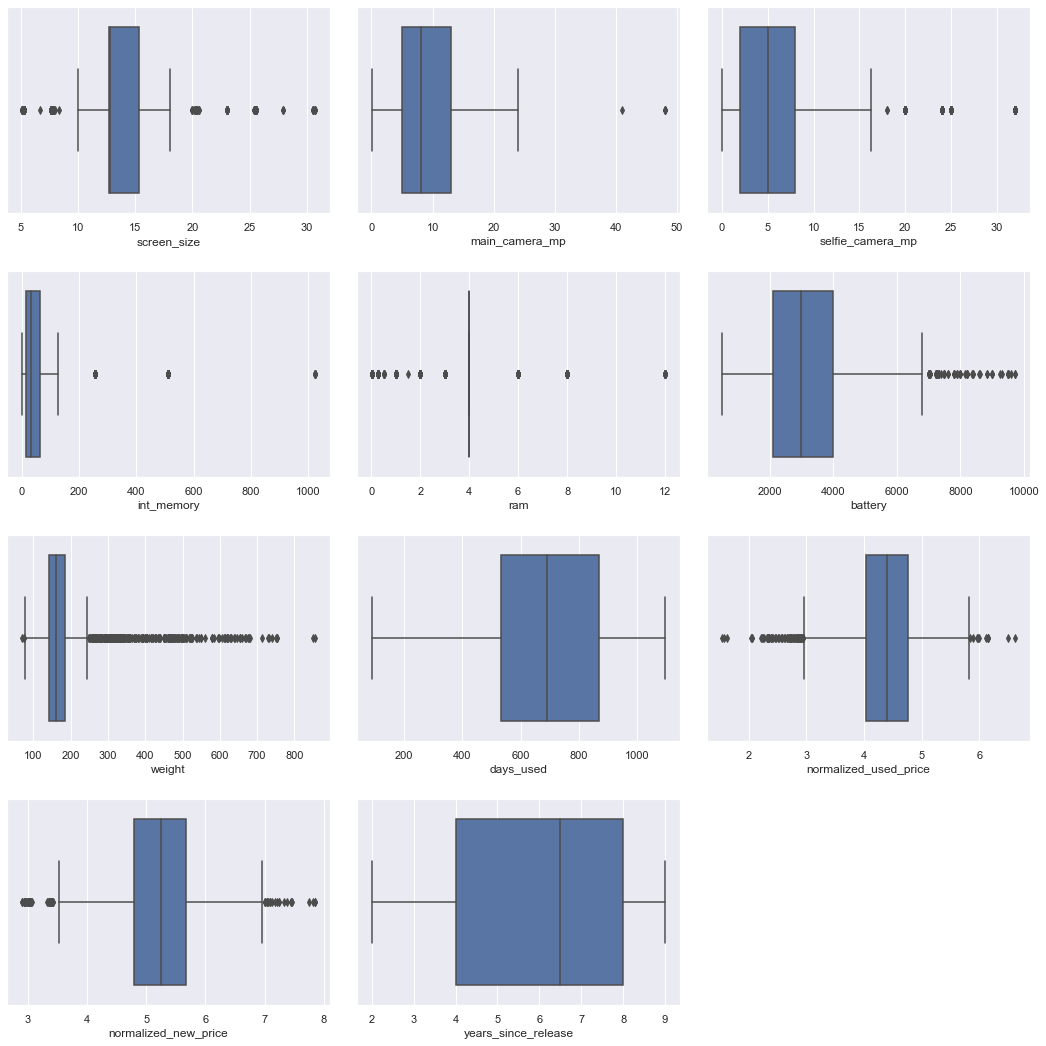

In [47]:
# outlier detection using boxplot
num_cols = df_nmv.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_nmv, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* Outliers are present for most of the categories, but we are not going to treat them like actual values. 
* Battery and weight have the largest amount of outliers
* Normalized_used_price has outliers on both sides of the whiskers, but since that is going to be what we are predicting (Y value) then we can ignore them. 

## EDA

- It is a good idea to explore the data once again after manipulating it.

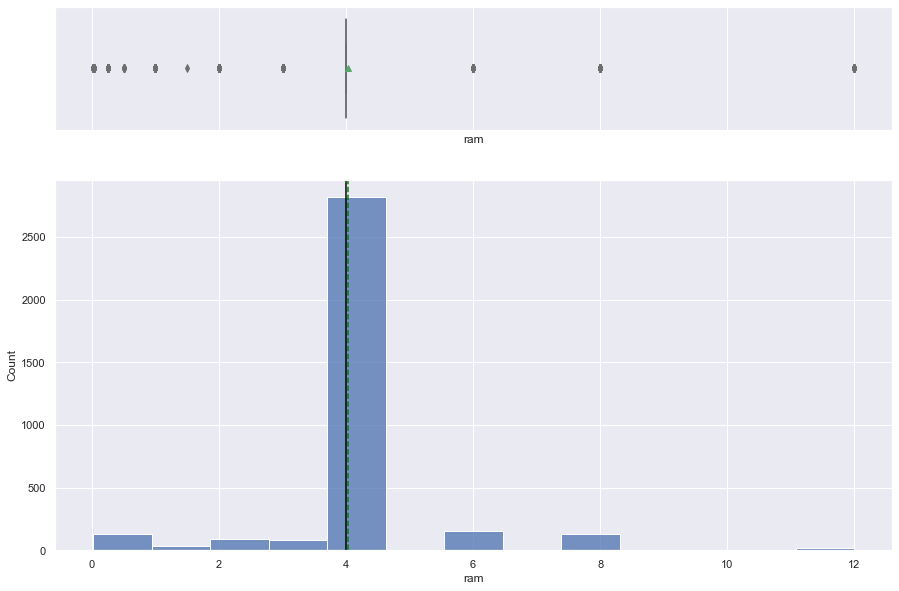

In [48]:
histogram_boxplot(df_nmv, "ram")

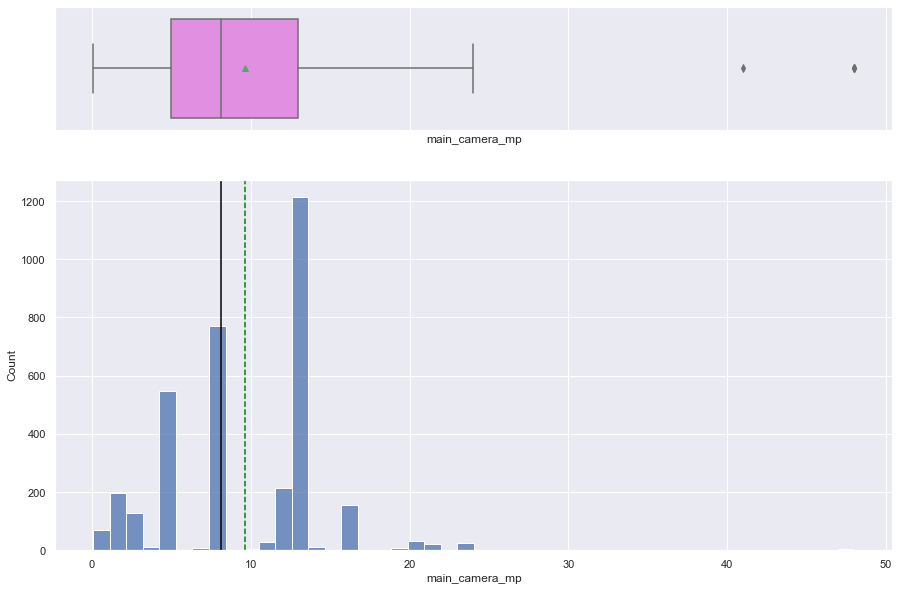

In [49]:
histogram_boxplot(df_nmv, "main_camera_mp")

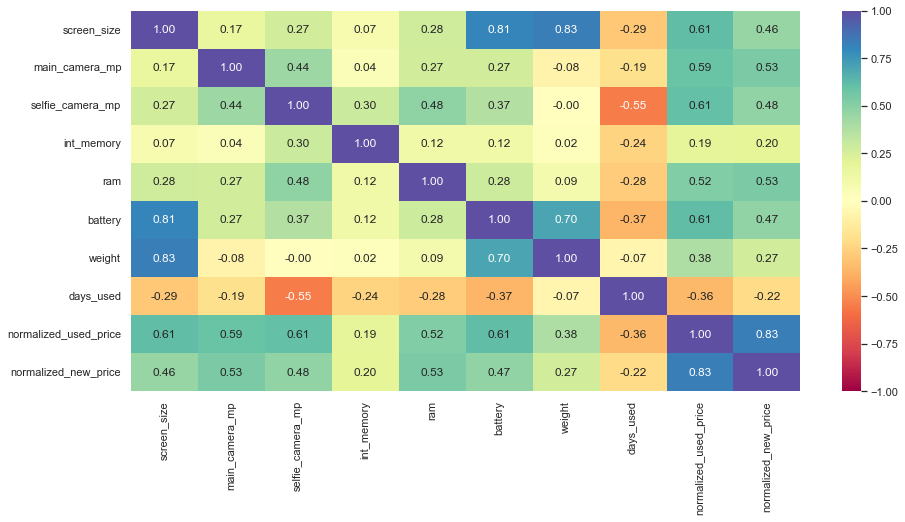

In [50]:
cols_list = df_nmv.select_dtypes(include=np.number).columns.tolist()
# dropping years_since_release as it is a temporal variable
cols_list.remove("years_since_release")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df_nmv[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

The correlation map for the normalized_used_price hasn't changed now that null values have been treated. The mean for the ram and main camera have shifted to the right with the imputation of the median for fillna(). 

## Model Building - Linear Regression

#### 1) We want to predict the normalized price of a used device. We will start by defining the X and Y. 

In [51]:
# defining X and y variables
X = df_nmv.drop(["normalized_used_price"], axis=1)
y = df_nmv["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    2  
1              5.519018                    2  
2              5.884631                    2  
3              5.6

In [83]:
# let's add the intercept to data
X = sm.add_constant(X)


C:\Users\Cristi Mar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### 2) Now we encode categorical features.

In [53]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


We have expanded the data frame from 14 columns to 49 in order to create the boolean values for non numerical categories. 

#### 3. We'll split the data into train and test to be able to evaluate the model that we build on the train data

In [54]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [55]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


#### 4. Build the model

In [56]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                           14:22:00   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

Let's check the performance of the model using different metrics.

We will be using metric functions defined in sklearn for RMSE, MAE, and R2.
We will define a function to calculate MAPE and adjusted R2.

The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
We will create a function which will print out all the above metrics in one go.

In [57]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [58]:

# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [59]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


#### Observations

The training R2 is 0.84, so the model is not underfitting

The train and test RMSE and MAE are comparable, so the model is not overfitting either

MAE suggests that the model can predict used prices within a mean error of 0.18 on the test data

MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the used price. 

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1) No Multicollinearity

2) Linearity of variables

3) Independence of error terms

4) Normality of error terms

5) No Heteroscedasticity

#### 1) We will test for multicollinearity using VIF.

General Rule of thumb:

If VIF is 1 then there is no correlation between the kth predictor and the remaining predictor variables.
If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [60]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif


In [61]:
checking_vif(x_train)

,feature,VIF
0,const,233.235691
1,screen_size,7.677290
2,main_camera_mp,2.288130
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


#### Remove multicollinearity

Drop every column one by one that has a VIF score greater than 5.
Look at the adjusted R-squared and RMSE of all these models.
Drop the variable that makes the least change in adjusted R-squared.
Check the VIF scores again.
Continue till you get all VIF scores under 5.

In [62]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [76]:
col_list = ['screen_size', 'weight', 'brand_name_Apple', 'brand_name_Huawei', 'brand_name_Others', 'brand_name_Samsung', 'os_iOs'] ## Columns with high VIF

res = treating_multicollinearity(x_train, y_train, col_list) ## Code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.841809,0.232201
1,brand_name_Huawei,0.841808,0.232201
2,brand_name_Others,0.841806,0.232203
3,brand_name_Samsung,0.841774,0.232227
4,os_iOs,0.841742,0.232250
5,screen_size,0.838381,0.234703
6,weight,0.838071,0.234928


In [63]:
col_to_drop = "brand_name_Apple"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,232.739939
1,screen_size,7.643583
2,main_camera_mp,2.287508
3,selfie_camera_mp,2.791121
4,int_memory,1.364138
5,ram,2.273686
6,battery,4.079720
7,weight,6.394014
8,days_used,2.659799
9,normalized_new_price,3.102417


After dropping the brand_name_Apple column we still have colums with moderate to high VIF.The next highest VIF belongs to brand_name_Others.  

In [64]:
col_to_drop = "brand_name_Others"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Others


,feature,VIF
0,const,155.654900
1,screen_size,7.570160
2,main_camera_mp,2.286044
3,selfie_camera_mp,2.789316
4,int_memory,1.363494
5,ram,2.270179
6,battery,4.079499
7,weight,6.368105
8,days_used,2.659536
9,normalized_new_price,3.101340


Moderate to high VIF values still in model: screen_size and weight

In [65]:
col_to_drop = "screen_size"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,136.251792
1,main_camera_mp,2.283014
2,selfie_camera_mp,2.787261
3,int_memory,1.361141
4,ram,2.270071
5,battery,3.832887
6,weight,2.988543
7,days_used,2.648067
8,normalized_new_price,3.053912
9,years_since_release,4.715423


There are no more moderate to high VIFS now to rebulild the model and check the Pvalues. 

In [66]:
olsmod1 = sm.OLS(y_train, x_train4).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     279.6
Date:                   Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                           14:26:40   Log-Likelihood:                 97.446
No. Observations:                   2417   AIC:                            -102.9
Df Residuals:                       2371   BIC:                             163.5
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Drop high P values
We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
Instead, we will do the following:
* Build a model, check the p-values of the variables, and drop the column with the highest p-value.
* Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
Repeat the above two steps till there are no columns with p-value > 0.05.
The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [67]:
# initial list of columns
predictors = x_train4.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes', '5g_yes']


In [68]:
x_train5 = x_train4[selected_features]
x_test5 = x_test4[selected_features]

In [69]:
olsmod2 = sm.OLS(y_train, x_train5).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     965.2
Date:                   Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                           14:27:39   Log-Likelihood:                 80.857
No. Observations:                   2417   AIC:                            -133.7
Df Residuals:                       2403   BIC:                            -52.65
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Now we can test for the remaing four assumptions with the olsmod2. 

#### 2. Linearity of Variables. 
#### 3. independance of Variables

In [70]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.860330,0.227158
1525,4.448399,4.641121,-0.192722
1128,4.315353,4.280485,0.034868
3003,4.282068,4.182338,0.099730
2907,4.456438,4.484614,-0.028176


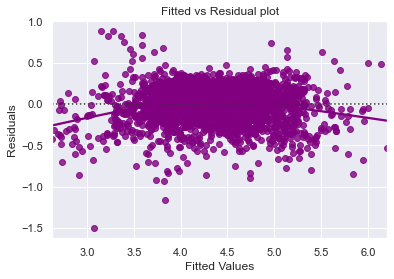

In [71]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

If any pattern exists in this plot, we consider it as a sign of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

##### We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

#### 3. Test for Normality
We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
   * If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
   * If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

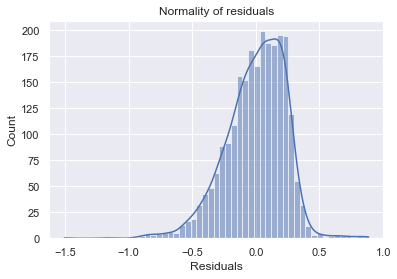

In [72]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

There is a slightly skewed bell shaped curve present. We will also check the QQ plot. 


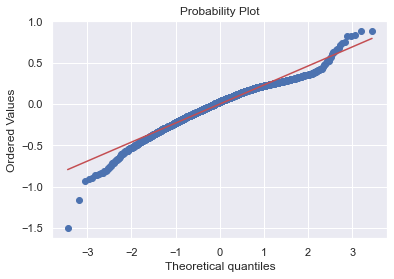

In [73]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

They follow the line for the most part, but the tails deviate. We will also run the Shapiro-Wilkes test. 

In [74]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9683111906051636, pvalue=1.1354187342638926e-22)

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Strictly speaking, the residuals are not normal.
* However, as an approximation, we can accept this distribution as close to being normal.
#### So, the assumption is satisfied.

#### 4. Homoscedasticity
* We will test for homoscedasticity by using the goldfeldquandt test.
* If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [75]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train5) ## Code with training data to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.019162646880213), ('p-value', 0.3714748049280724)]

The p value of .37 meaning that we can accept the null and assume that the results are homoscedastic. 

### Test the model

Now we can test the model with the test data and see the prediction. 

In [76]:
# predictions on the test set
pred = olsmod2.predict(x_test5)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.375834
2341,3.696103,3.996268
1913,3.592093,3.638329
688,4.306495,4.090478
650,4.522115,5.178461
2291,4.259294,4.386189
40,4.997685,5.440825
1884,3.875359,4.044567
2538,4.206631,4.060787
45,5.380450,5.216557


Actual vs Predicted is comparable. 

## Final Model

In [77]:
x_train_final = x_train5.copy()
x_test_final = x_test5.copy()

In [78]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     965.2
Date:                   Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                           14:30:50   Log-Likelihood:                 80.857
No. Observations:                   2417   AIC:                            -133.7
Df Residuals:                       2403   BIC:                            -52.65
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [79]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23401,0.18301,0.839268,0.838331,4.398555


In [80]:

# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241343,0.187535,0.838509,0.836297,4.570255


The model is able to explain ~84% of the variation in the data

The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

The MAPE on the test set suggests we can predict within 4.5% of the used price

Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

- The model is able to explain ~84% of the variation in the data and within 4.5% of the used price on the test data, which is good
- This indicates that the model is good for prediction as well as inference purposes
- If the main camera mp size increases by 1mp then the price will increase by .02.
- If the selfie camera mp size increases by 1mp then the price of the device will increase by .01.
- If the ram increases by 1 unit then the price increases by .02.
- If the weight increases by 1 unit then the price increases by .001.
- If the new price increases by 1 unit then the used price increases by .43. 
- If the the Years since release increases by a year then the price decreases by  .029.
- Brand names Karbonn, Lenovo, Nokia, and Xiaomi can increase the used price by .12, .05, .06, and .09 respectively. 
- If the device is of the "Other" operating system then the price will decrease by .14. 
- A device with 4g can add .04 to their price, but one with 5g will decrease .06. 
- The brands Karbonn and Xiaomi have the greatest effect on the price model indicating that they may be considered more marketable or popular brands for the market. 
- As expected the more expensive the new price the higher the price we can ask for the used device. ReCell may want to run and experiment to see if the market is there for the pricier models. 
- 5g capability decreased the price which is surprising, but may be due to limited 5g access. 4g capable phones are still the most popular and push the used price higher. 
- Recell may want to avoid getting older devices and those without well know operating systems. Both of these factors will drive the used price down decreasing profitibility. 
- Recell should do a geographic study on the market to see which regions are purchasing the devices, as well as a study of the customers that are making the purchases. The more we know about their age, gender, income, jobs, etc. the better choices we can make when choosing devices to purchase for resell. 

